In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
path_to_zips = '/home/dsc/Data/challenger'

In [6]:
! ls {path_to_zips}

bookings.csv.bz2  searches.csv.bz2


## Ejercicio 1

In [9]:
import bz2

newfile = bz2.BZ2File(path_to_zips + "/bookings.csv.bz2")

n = 0
for l in newfile:
    n = n + 1

In [10]:
n

10000011

## Ejercicio 2

In [11]:
Fichero de bookings con columna 
arr_port --> Aeropuerto
pax --> Pasajeros

In [31]:
df = pd.read_csv(path_to_zips + "/bookings.csv.bz2", delimiter='^',usecols=["arr_port","pax"])


In [21]:
df.sample(5)

,arr_port,pax
15144,BCN,1
49376,LAX,3
34381,LIM,1
36815,AJA,4
39498,LBV,-1


In [32]:
df_sum = df.groupby("arr_port").sum().sort("pax")

In [37]:
df2 = df_sum.reset_index()

In [39]:
df2.sort('pax',ascending=False).head(10)

,arr_port,pax
2273,LHR,88809
2272,MCO,70930
2271,LAX,70530
2270,LAS,69630
2269,JFK,66270
2268,CDG,64490
2267,BKK,59460
2266,MIA,58150
2265,SFO,58000
2264,DXB,55590


In [ ]:
# No cabe en memoria, hacerlo por chunks

In [71]:
# Objeto para iterar y cada iteración devuelve un dataframe
df = pd.read_csv(path_to_zips + "/bookings.csv.bz2", delimiter='^',usecols=["arr_port","pax"],chunksize=100000)

In [67]:
# Primera solucion: Concatenación de los top 10
l = []
for chunk in df:
    l.append(chunk.fillna(0).groupby('arr_port').sum().reset_index().sort('pax',ascending=False).head(10))

total = pd.concat(l)
total_2 = total.groupby('arr_port').sum().reset_index()
total_2.sort('pax',ascending=False).head(10)

In [ ]:
# Segunda solucion: Concatenación de los agrupados
l = []
for chunk in df:
    l.append(chunk.fillna(0).groupby('arr_port').sum().reset_index()

total = pd.concat(l)
total_2 = total.groupby('arr_port').sum().reset_index()
total_2.sort('pax',ascending=False).head(10)

In [72]:
# Tercera solucion: Concatenación de los agrupados, pero con tamaño constante
primera_iteracion = True

for chunk in df:
    s = chunk.fillna(0).groupby('arr_port').sum().reset_index()
    
    if primera_iteracion == True:
        total = s
        primera_iteracion = False
    else:
        total = pd.concat([total,s])
        
    total = total.groupby('arr_port').sum().reset_index()

total_2 = total.groupby('arr_port').sum().reset_index()
total_2.sort('pax',ascending=False).head(10)

,arr_port,pax
1088,LHR,88809
1190,MCO,70930
1050,LAX,70530
1047,LAS,69630
886,JFK,66270
315,CDG,64490
216,BKK,59460
1228,MIA,58150
1719,SFO,58000
517,DXB,55590


In [110]:
top = total_2.sort('pax',ascending=False).head(10)

In [40]:
## Ejercicio 3: Uso de Geobase

In [ ]:
# Instalación de geobase: sudo pip install geobases
# En línea de comandos geobase + aeropuerto y se obtiene información del aeropuerto

In [74]:
!GeoBase MAD

Loading "ori_por"...
Looking for matches from MAD...
Keeping 1 result(s) from 1 initially...

__ref__                                 0                                       
__key__                                 MAD                                     
__dup__                                 ['MAD@1']                               
__par__                                 []                                      
__lno__                                 7379                                    
iata_code                               MAD                                     
icao_code                               LEMD                                    
faa_code                                                                        
is_geonames                             Y                                       
geoname_id                              6299345                                 
valid_id                                                                        
name           

In [75]:
from GeoBases import GeoBase

In [76]:
g = GeoBase(data='ori_por',verbose=False)

In [119]:
g.get('MAD')['city_name_ascii']
g.get('MAD')['name']

'Madrid / Barajas'

In [113]:
def nombre_aeropuerto(codigo):
    return g.get(codigo.strip())['name']

In [115]:
top['names_map'] = top['arr_port'].map(nombre_aeropuerto)
top

,arr_port,pax,arr_port_good,names,cities,countries,names_map
1088,LHR,88809,NaN,London Heathrow Airport,London,United Kingdom,London Heathrow Airport
1190,MCO,70930,NaN,Orlando International Airport,Orlando,United States,Orlando International Airport
1050,LAX,70530,NaN,Los Angeles International Airport,Los Angeles,United States,Los Angeles International Airport
1047,LAS,69630,NaN,Mc Carran International Airport,Las Vegas,United States,Mc Carran International Airport
886,JFK,66270,NaN,John F Kennedy International Airport,New York City,United States,John F Kennedy International Airport
315,CDG,64490,NaN,Paris - Charles-de-Gaulle,Paris,France,Paris - Charles-de-Gaulle
216,BKK,59460,NaN,Suvarnabhumi,Bangkok,Thailand,Suvarnabhumi
1228,MIA,58150,NaN,Miami International Airport,Miami,United States,Miami International Airport
1719,SFO,58000,NaN,San Francisco International Airport,San Francisco,United States,San Francisco International Airport
517,DXB,55590,NaN,Dubai International Airport,Dubai,United Arab Emirates,Dubai International Airport


In [112]:
cities = top.arr_port.apply(lambda a: g.get(a.strip())['city_name_ascii'])
countries = top.arr_port.map(lambda a: g.get(a.strip())['country_name'])

top['cities'] = cities
top['countries'] = countries

In [3]:
## Tercer ejercicio

In [4]:
# Incrustar las salidas al notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
! ls {path_to_zips}

bookings.csv  bookings.csv.bz2	searches.csv.bz2  sql


In [18]:
# Visualización del formato del archivo
df = pd.read_csv(path_to_zips + "/searches.csv.bz2", delimiter='^',nrows=100)

In [19]:
df.columns

Index([u'Date', u'Time', u'TxnCode', u'OfficeID', u'Country', u'Origin',
       u'Destination', u'RoundTrip', u'NbSegments', u'Seg1Departure',
       u'Seg1Arrival', u'Seg1Date', u'Seg1Carrier', u'Seg1BookingCode',
       u'Seg2Departure', u'Seg2Arrival', u'Seg2Date', u'Seg2Carrier',
       u'Seg2BookingCode', u'Seg3Departure', u'Seg3Arrival', u'Seg3Date',
       u'Seg3Carrier', u'Seg3BookingCode', u'Seg4Departure', u'Seg4Arrival',
       u'Seg4Date', u'Seg4Carrier', u'Seg4BookingCode', u'Seg5Departure',
       u'Seg5Arrival', u'Seg5Date', u'Seg5Carrier', u'Seg5BookingCode',
       u'Seg6Departure', u'Seg6Arrival', u'Seg6Date', u'Seg6Carrier',
       u'Seg6BookingCode', u'From', u'IsPublishedForNeg', u'IsFromInternet',
       u'IsFromVista', u'TerminalID', u'InternetOffice'],
      dtype='object')

In [111]:
# Leemos el archivo con las columnas adecuadas: arr_city y act_date
df = pd.read_csv(path_to_zips + "/searches.csv.bz2", delimiter='^',  nrows=1e6, parse_dates=['Date'], usecols=['Destination','Date'])

In [112]:
type(df.Date[0])

pandas.tslib.Timestamp

In [113]:
def getmonth(date):
    return date.month

In [114]:
df['Month'] = df['Date'].dropna().map(getmonth)

In [115]:
# Filtro por Madrid, Malaga y Barcelona: MAD, AGP, BCN
filtro1 = df['Destination'] == "MAD"
filtro2 = df['Destination'] == "AGP"
filtro3 = df['Destination'] == "BCN"
# df.Destination.isin(["MAD","AGP","BCN"])

In [116]:
filtro_total = (filtro1 | filtro2 | filtro3)
df_filtro = df[filtro_total]

In [127]:
df_group = df_filtro.groupby(['Destination','Month']).count().reset_index()

In [128]:
df_group.sample(5)

,Destination,Month,Date
7,AGP,8,414
19,BCN,8,1425
15,BCN,4,1644
27,MAD,4,1329
17,BCN,6,1395


In [99]:
# Graficar
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 12 artists>

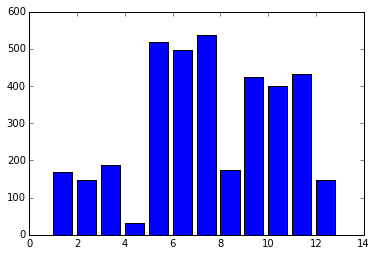

In [104]:
plt.bar(range(1,13),df_group['Date'])

In [129]:
df2 = pd.pivot_table(df_group,index=['Month'],columns=['Destination'],aggfunc=np.sum)

In [130]:
df2.sample(5)

Date            
Destination  AGP   BCN   MAD
Month                       
9            429  1233  1113
1            507  1551  1275
6            417  1395  1200
5            570  1512  1386
12           132   550   518

<Container object of 12 artists>

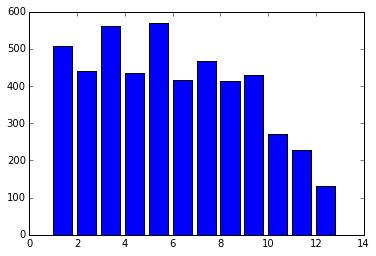

In [138]:
# Búsquedas en Málaga
plt.bar(range(1,13),df2.Date.AGP)

<Container object of 12 artists>

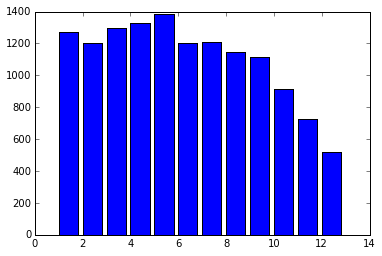

In [139]:
# Búsquedas en Madrid
plt.bar(range(1,13),df2.Date.MAD)

<Container object of 12 artists>

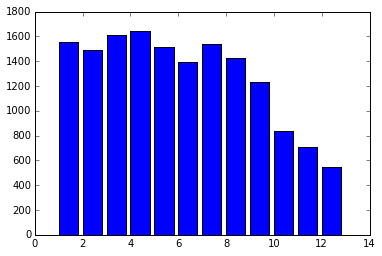

In [140]:
#Búsqueda en Barcelona
plt.bar(range(1,13),df2.Date.BCN)

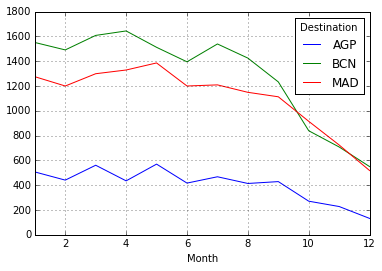

In [146]:
# Otra opción con el método pivot
p = df_group.pivot('Month','Destination','Date')
p.plot(grid=True)

In [147]:
# Cuarto ejercicio
# Analisis de las columnas disponibles en los archivos
# Fichero de búsquedas
df_search = pd.read_csv(path_to_zips+"/searches.csv.bz2",nrows=100, delimiter='^',parse_date=["Seg1Date","Origin","Destination"])

# Seg1Date es la fecha de búsqueda
# Origin es el aeropuerto origen
# Destination es el aeropuesto destino

# Fichero de bookings
df_book = pd.read_csv(path_to_zips+"/bookings.csv.bz2",nrows=100, delimiter='^',
                      usecols=['brd_port','off_port','brd_time           '])

# Date es la fecha de la búsqueda
# brd_port es el aeropuerto origen
# off_port es el earopuerto destino final

In [148]:
df_search.columns

Index([u'Date', u'Time', u'TxnCode', u'OfficeID', u'Country', u'Origin',
       u'Destination', u'RoundTrip', u'NbSegments', u'Seg1Departure',
       u'Seg1Arrival', u'Seg1Date', u'Seg1Carrier', u'Seg1BookingCode',
       u'Seg2Departure', u'Seg2Arrival', u'Seg2Date', u'Seg2Carrier',
       u'Seg2BookingCode', u'Seg3Departure', u'Seg3Arrival', u'Seg3Date',
       u'Seg3Carrier', u'Seg3BookingCode', u'Seg4Departure', u'Seg4Arrival',
       u'Seg4Date', u'Seg4Carrier', u'Seg4BookingCode', u'Seg5Departure',
       u'Seg5Arrival', u'Seg5Date', u'Seg5Carrier', u'Seg5BookingCode',
       u'Seg6Departure', u'Seg6Arrival', u'Seg6Date', u'Seg6Carrier',
       u'Seg6BookingCode', u'From', u'IsPublishedForNeg', u'IsFromInternet',
       u'IsFromVista', u'TerminalID', u'InternetOffice'],
      dtype='object')

In [150]:
df_book.columns

Index([u'act_date           ', u'source', u'pos_ctry', u'pos_iata',
       u'pos_oid  ', u'rloc          ', u'cre_date           ', u'duration',
       u'distance', u'dep_port', u'dep_city', u'dep_ctry', u'arr_port',
       u'arr_city', u'arr_ctry', u'lst_port', u'lst_city', u'lst_ctry',
       u'brd_port', u'brd_city', u'brd_ctry', u'off_port', u'off_city',
       u'off_ctry', u'mkt_port', u'mkt_city', u'mkt_ctry', u'intl',
       u'route          ', u'carrier', u'bkg_class', u'cab_class',
       u'brd_time           ', u'off_time           ', u'pax', u'year',
       u'month', u'oid      '],
      dtype='object')

In [193]:
# Fichero de búsquedas
df_search = pd.read_csv(path_to_zips+"/searches.csv.bz2",nrows=1e6, delimiter='^',
                        usecols=["Seg1Date","Origin","Destination"], parse_dates=["Seg1Date"])

# Fichero de bookings
df_book = pd.read_csv(path_to_zips+"/bookings.csv.bz2",nrows=1e6, delimiter='^',
                      usecols=['brd_port','off_port','brd_time           '],
                      parse_dates=['brd_time           '])


In [194]:
# Renombra la columna brd_time

# Limpieza de la fecha de bookings
def getDate(date):
    return datetime.datetime(date.year,date.month,date.day)
# return date.date()

df_book['Date'] = df_book['brd_time           '].map(getDate)
df_book.drop('brd_time           ',axis=1)

,brd_port,off_port,Date
0,LHR,ZRH,2013-03-07
1,SAL,CLT,2013-04-12
2,CLT,SAL,2013-07-15
3,AKL,SVO,2013-04-24
4,SVO,AKL,2013-05-14
5,DEN,LGA,2013-04-07
6,LGA,DEN,2013-04-11
7,NRT,SIN,2013-04-14
8,SIN,PEN,2013-04-16
9,PEN,BKK,2013-04-18


In [195]:
# Limpieza de origen y destino eliminando espacios

def strip_str(str):
    return str.strip()

df_book['brd_port'] = df_book['brd_port'].map(strip_str)
df_book['off_port'] = df_book['off_port'].map(strip_str)

In [196]:
merge = pd.merge(df_book, df_search, how='inner', 
                 left_on=['brd_port','off_port','Date'], 
                 right_on=["Origin","Destination","Seg1Date"])

In [197]:
len(merge)

102051

In [ ]:
# Si el merge hubiera sido un left join, nos interesaría generar una columna match a 0/1 que indique si ha habido un match
# m['match'] = m.brd_port.apply(lambda b: not pd.isnull(b))

In [ ]:
## Quinto Ejercicio

In [ ]:
# Instalación de Flask
#sudo pip install flask
#flask es es una biblioteca de python para crear servicios web - para crear un API Resp
#DJANGO también es otra biblioteca mucho más grande

In [198]:
# Creamos nuestro primer web service
from flask import Flask

In [200]:
# Creación de la aplicación
#del app
app = Flask("Mi primer web service")

In [202]:
# Usa decoradores de python para crear las rutas que vamos a utilizar para usar las rutas que utilizará la app
@app.route('/hello')
# Declaración de la función de python que ejecutará el web service
def get_hello():
    return "Hola desde Flask!!"

In [203]:
# Abre un servidor que escucha en el puerto 5000
# http://localhost:5000/hello
app.run()

In [206]:
import pandas as pd

def getTopAirports(n):
    df = pd.read_csv(path_to_zips + "/bookings.csv.bz2", delimiter='^',usecols=["arr_port","pax"],nrows=1e5)
    df_sum = df.groupby("arr_port").sum().sort("pax").reset_index()
    return df_sum.sort('pax',ascending=False).head(n)

In [208]:
getTopAirports(3)

,arr_port,pax
1505,LHR,1006
1504,MCO,861
1503,JFK,795


In [210]:
del app1
app1 = Flask('Servicio Web Top Aeropuertos')
@app1.route("/topAirport/<int:x>")

# Se le dice al servicio que recibirá un parámetro entero
def get_topAirport(x):
    return getTopAirports(x).to_json()

In [ ]:
app1.run()

In [ ]:
# Para consumir el servicio, en otra sesión de python ejecutar la petición:
# pd.read_json("http://localhost:5000/topAirport/<número de aeropuertos>")